# **IMPORTATIONS**

In [145]:
import pickle
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

In [146]:
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit

# **PRE-PROCCESS**

On normalise les données et sépare les données d'entrainement et de tests : 

In [147]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **MODÈLE**

In [148]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
y_pred = classifier.predict(X_test)

**Regardons les résultats pour les données tests :**

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

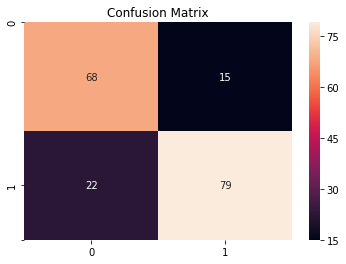

In [150]:
cm = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)

plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy : 

In [151]:
print("Accuracy pour les données test : ")
print(accuracy_score(y_pred, y_test))

Accuracy pour les données test : 
0.7989130434782609


* sensibilité : 

In [152]:
tpr = recall_score(y_test, y_pred)
print("La sensibilité pour les données tests est : ")
print(tpr)

La sensibilité pour les données tests est : 
0.8404255319148937


* precision : 

In [153]:
print("La précision pour les données test est : ")
print(precision_score(y_test, y_pred))

La précision pour les données test est : 
0.7821782178217822


* F-Measure :

In [154]:
print("F-Measure pour les données test : ")
print(f1_score(y_test, y_pred))

F-Measure pour les données test : 
0.8102564102564104


**Regardons les résultats pour les données d'entrainement :** 

In [155]:
y_pred_train = classifier.predict(X_train)

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

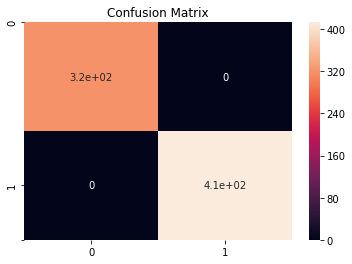

In [156]:
cm = confusion_matrix(y_pred_train, y_train)

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)

plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy :

In [157]:
accuracy_score(y_pred_train, y_train)

1.0

* sensibilité :

In [158]:
recall_score(y_train, y_pred_train)

1.0

* precision :

In [159]:
precision_score(y_train, y_pred_train)

1.0

* F-Measure : 

In [160]:
f1_score(y_train, y_pred_train)

1.0

**Regroupons les résultats dans un dataframe pandas :**

In [161]:
d = {
     'Model': 'Decision Tree',
     'Training Set Accuracy': accuracy_score(y_pred_train, y_train),
     'Test Set Accuracy': accuracy_score(y_pred, y_test),
     'Training Set TPR' : recall_score(y_train, y_pred_train),
     'Test Set TPR' : recall_score(y_test, y_pred),
     'Training Set PPV' : precision_score(y_train, y_pred_train),
     'Test Set PPV' : precision_score(y_test, y_pred),
     'Training Set F-Measure' : f1_score(y_train, y_pred_train),
     'Test Set F-Measure' : f1_score(y_test, y_pred)
}

df_models_dt = pd.DataFrame(d, index=[0])
df_models_dt

,Model,Training Set Accuracy,Test Set Accuracy,Training Set TPR,Test Set TPR,Training Set PPV,Test Set PPV,Training Set F-Measure,Test Set F-Measure
0,Decision Tree,1.0,0.798913,1.0,0.840426,1.0,0.782178,1.0,0.810256


In [162]:
with open('df_models_dt.pickle', 'wb') as output:
    pickle.dump(df_models_dt, output)